In [1]:
from google.colab import drive
drive.mount('/content/dfrive')

Mounted at /content/dfrive


Name : 게임의 이름입니다. 

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.



**다음 분기에는 어떤게임을 설계해야할까?**

1.지역에 따라서 선호하는 게임 장르가 다를까

2.연도별 게임의 트렌드가 있을까

3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('/content/dfrive/MyDrive/Colab Notebooks/vgames2.csv')
df = df.drop(["Unnamed: 0",], axis=1)
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16598 rows x 9 columns]

In [3]:
df.info() #데이터 결측 및 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
df = df.dropna().reset_index(drop = True) # 데이터 결측치 제거 및 인덱스 재지정
df.head()

Name Platform  ...  JP_Sales Other_Sales
0                    Candace Kane's Candy Factory       DS  ...         0           0
1                                  The Munchables      Wii  ...         0        0.01
2  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  ...      0.02           0
3                Deal or No Deal: Special Edition       DS  ...         0           0
4       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  ...         0        0.04

[5 rows x 9 columns]

In [5]:
# 판매량 단위를 전체 M으로 통일
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': ''}, regex=True).map(pd.eval).astype(float)*1e6
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': ''}, regex=True).map(pd.eval).astype(float)*1e6
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': ''}, regex=True).map(pd.eval).astype(float)*1e6
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*0.001', 'M': ''}, regex=True).map(pd.eval).astype(float)*1e6
df.head()

Name  ... Other_Sales
0                    Candace Kane's Candy Factory  ...         0.0
1                                  The Munchables  ...     10000.0
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...         0.0
3                Deal or No Deal: Special Edition  ...         0.0
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...     40000.0

[5 rows x 9 columns]

In [6]:
df.loc[:,'NA_Sales':'Other_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'].astype(int)
df.head()

Name  ... Other_Sales
0                    Candace Kane's Candy Factory  ...           0
1                                  The Munchables  ...       10000
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                Deal or No Deal: Special Edition  ...           0
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...       40000

[5 rows x 9 columns]

In [7]:
df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].replace({0 : 2000, 1 : 2001, 2 : 2002, 3 : 2003,
                                 4 : 2004, 5 : 2005, 6 : 2006, 7 : 2007,
                                 8 : 2008, 9 : 2009, 10 : 2010, 11 : 2011,
                                12 : 2012, 13 : 2013, 14 : 2014, 15 : 2015,
                                16 : 2016, 86 : 1986, 94 : 1994, 95 : 1995,
                                96 : 1996, 97 : 1997, 98 : 1998,}, regex=True)
df.head()

Name  ... Other_Sales
0                    Candace Kane's Candy Factory  ...           0
1                                  The Munchables  ...       10000
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                Deal or No Deal: Special Edition  ...           0
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...       40000

[5 rows x 9 columns]

In [8]:
df['Total_Sales'] = df['NA_Sales'] + df['JP_Sales'] + df['EU_Sales'] + df['Other_Sales']
df.head()

Name  ... Total_Sales
0                    Candace Kane's Candy Factory  ...       40000
1                                  The Munchables  ...      180000
2  Otome wa Oanesama Boku ni Koi Shiteru Portable  ...       20000
3                Deal or No Deal: Special Edition  ...       40000
4       Ben 10 Ultimate Alien: Cosmic Destruction  ...      250000

[5 rows x 10 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16241 non-null  object
 1   Platform     16241 non-null  object
 2   Year         16241 non-null  int64 
 3   Genre        16241 non-null  object
 4   Publisher    16241 non-null  object
 5   NA_Sales     16241 non-null  int64 
 6   EU_Sales     16241 non-null  int64 
 7   JP_Sales     16241 non-null  int64 
 8   Other_Sales  16241 non-null  int64 
 9   Total_Sales  16241 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 1.2+ MB


In [10]:
df.describe()

Year      NA_Sales  ...   Other_Sales   Total_Sales
count  16241.000000  1.624100e+04  ...  1.624100e+04  1.624100e+04
mean    2006.406748  2.651955e+05  ...  4.823410e+04  5.390906e+05
std        5.832087  8.224307e+05  ...  1.896780e+05  1.563905e+06
min     1980.000000  0.000000e+00  ...  0.000000e+00  0.000000e+00
25%     2003.000000  0.000000e+00  ...  0.000000e+00  6.000000e+04
50%     2007.000000  8.000000e+04  ...  1.000000e+04  1.700000e+05
75%     2010.000000  2.400000e+05  ...  4.000000e+04  4.800000e+05
max     2020.000000  4.149000e+07  ...  1.057000e+07  8.274000e+07

[8 rows x 6 columns]

In [11]:
anova_df = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
anova_df.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0     Action     40000         0         0            0
1     Action    170000         0         0        10000
2  Adventure         0         0     20000            0
3       Misc     40000         0         0            0
4   Platform    120000     90000         0        40000

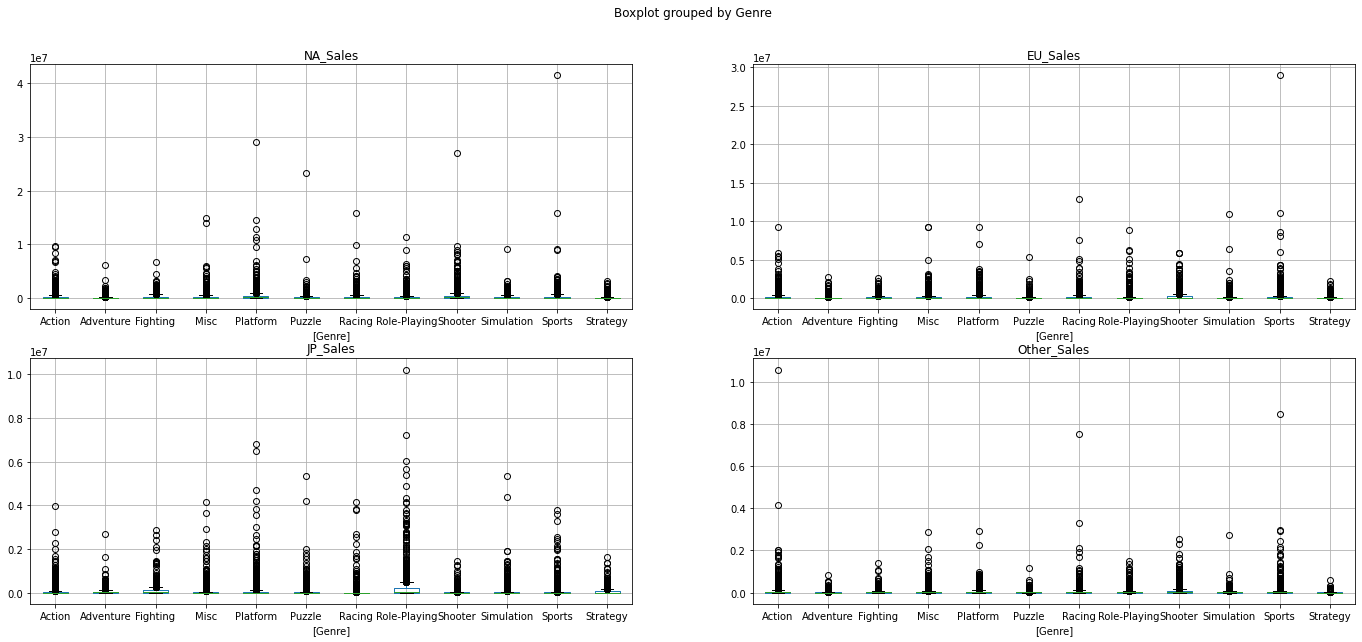

In [12]:
# 집단간의 평균차이를 검정하기 위해 Anova Test 실시
# boxplot를 이용하여 지역마다 장르에 따른 값들의 차이를 알아보자
# 지역에 따라서 선호하는 게임 장르는 다를까?
# 귀무가설 - 지역별 게임 장르에 따른 판매량 차이가 없다.
# 대립가설 - 지역별 게임 장르에 따른 판매량 차이가 있다.
import matplotlib.pyplot as plt
import seaborn as sns  

fig, axes = plt.subplots(2,2, figsize =(23,10))

ax = axes.flatten()

anova_df[['NA_Sales','Genre']].boxplot(by = 'Genre', ax=ax[0])
anova_df[['EU_Sales','Genre']].boxplot(by = 'Genre', ax=ax[1])
anova_df[['JP_Sales','Genre']].boxplot(by = 'Genre', ax=ax[2])
anova_df[['Other_Sales','Genre']].boxplot(by = 'Genre', ax=ax[3])

plt.show()

In [13]:
from scipy.stats import f_oneway
import scipy.stats as stats

stats.f_oneway(anova_df['NA_Sales'], anova_df['EU_Sales'], anova_df['JP_Sales'],anova_df['Other_Sales'])

F_onewayResult(statistic=565.4968037559275, pvalue=0.0)

In [14]:
# pvalue 값이 0,05보다 작으므로 지역별 게임 장르에 따른 판매량 차이가 있다.(귀무가설을 기각한다.)

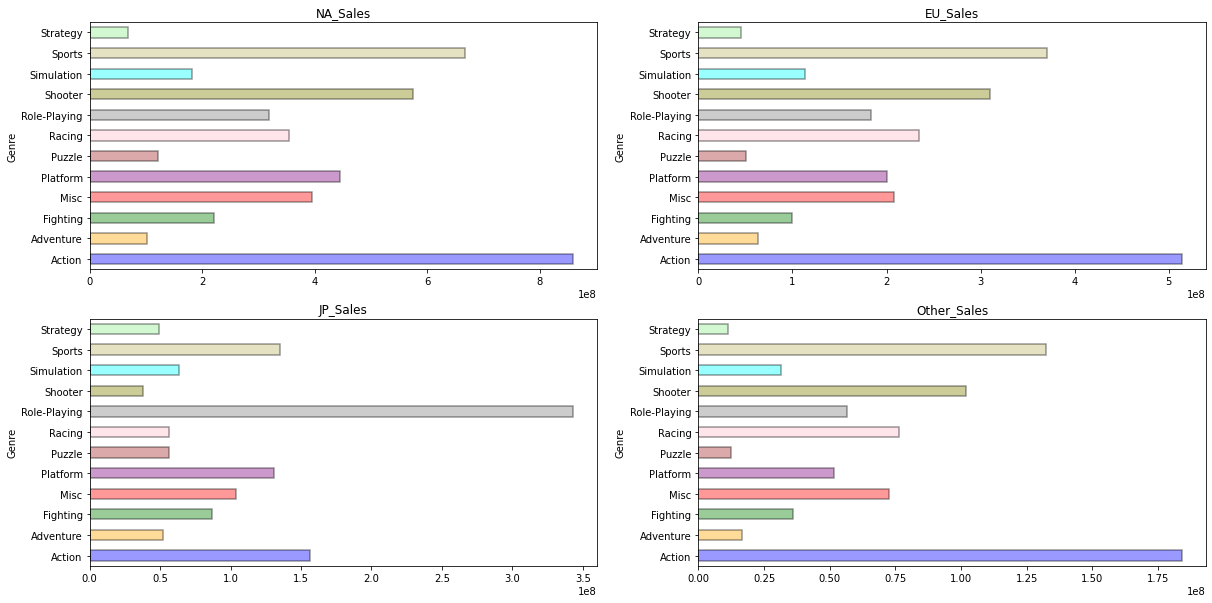

In [15]:
# 지역별로 선호하는 장르

fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
df.groupby('Genre')['NA_Sales'].sum().plot(kind = 'barh',title = 'NA_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,2)
df.groupby('Genre')['EU_Sales'].sum().plot(kind = 'barh',title = 'EU_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,3)
df.groupby('Genre')['JP_Sales'].sum().plot(kind = 'barh',title = 'JP_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,4)
df.groupby('Genre')['Other_Sales'].sum().plot(kind = 'barh',title = 'Other_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);


plt.show();

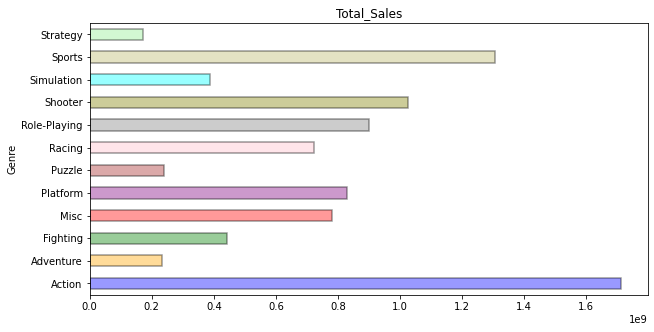

In [16]:
fig = plt.figure(figsize=(10,5))

df.groupby('Genre')['Total_Sales'].sum().plot(kind = 'barh',title = 'Total_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

**장르 선호 순위**

* 북미 지역에서는 Action, Sports, Shooter 장르 순으로 선호하고 있다.
* 유럽 지역에서는 Action, Sports, Shooter 장르 순으로 선호하고 있다.
* 일본 지역에서는 Role-Playing, Action, Shooter 장르 순으로 선호하고 있다.
* 그외 지역에서는 Action, Sports, Shooter 장르 순으로 선호하고 있다.

전체적으로 Action, Sports, Shooter 장르 순으로 선호하고 있다.

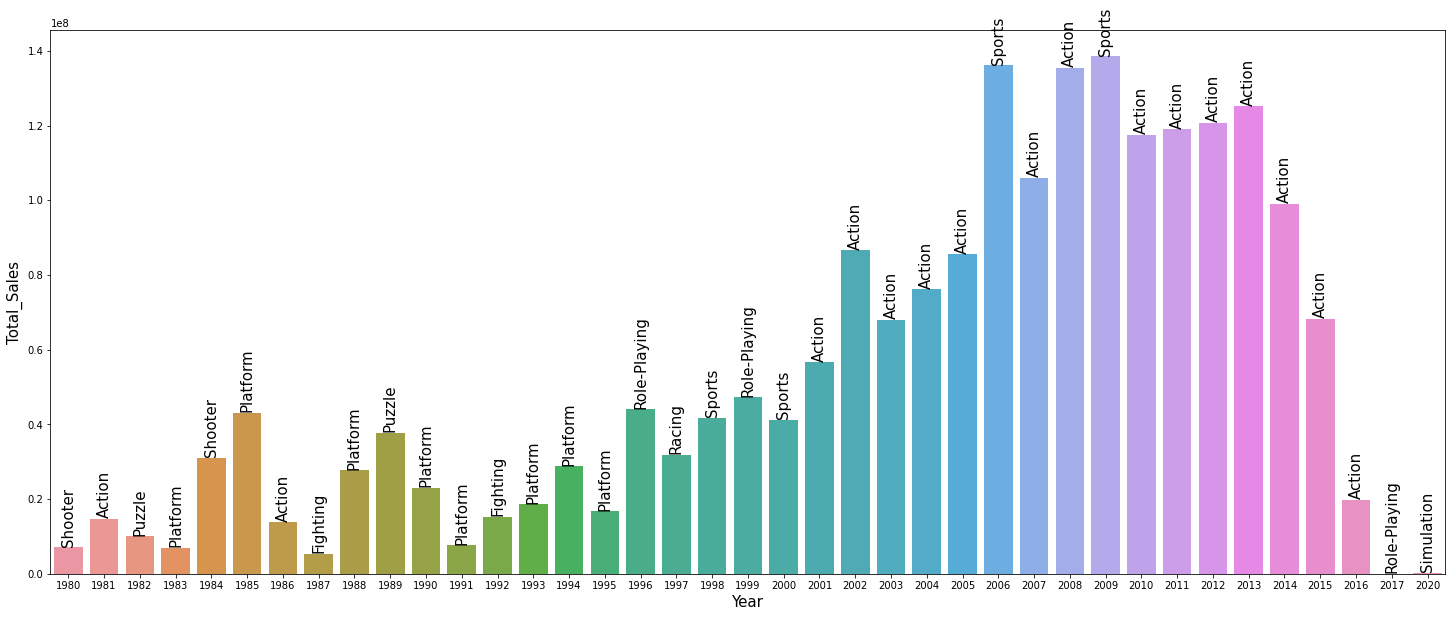

In [17]:
# 연도별 선호하는 게임 장르 시각화
year_df = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()
year_df1 = year_df.groupby('Year')['Total_Sales'].transform(max) == year_df['Total_Sales']
year_df_max = year_df[year_df1].reset_index(drop = True)


plt.figure(figsize=(25, 10))
ax = sns.barplot(x = 'Year', y= 'Total_Sales', data = year_df_max);

genre = year_df_max['Genre']

index = 0
for value in year_df_max['Total_Sales']:
    ax.text(x = index, y = value+1e6, s = genre[index], size=15, rotation= 90, ha="center")
    index += 1

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total_Sales', fontsize=15)

plt.show();

**선호하는 게임 장르 트렌드**

1980년~2000년까지는 다양한 장르의 게임들을 즐겼으며, 2001년부터는 Action 장르 게임이 인기가 많아지고 있으며 최근까지 트렌드를 이끌어가고 있습니다.

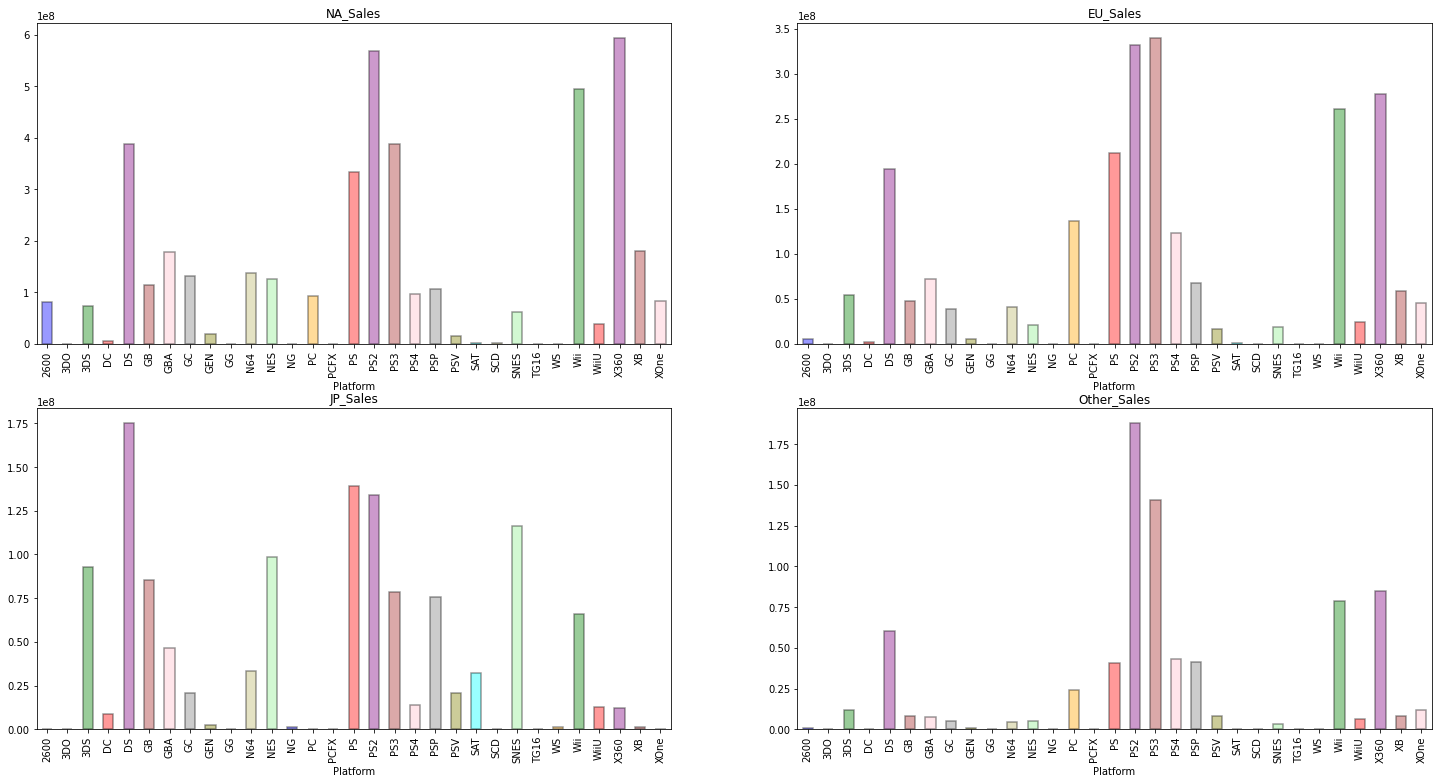

In [18]:
# 지역별 선호하는 플랫폼
fig = plt.figure(figsize=(25,13))

plt.subplot(2,2,1)
df.groupby('Platform')['NA_Sales'].sum().plot(kind = 'bar',title = 'NA_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,2)
df.groupby('Platform')['EU_Sales'].sum().plot(kind = 'bar',title = 'EU_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,3)
df.groupby('Platform')['JP_Sales'].sum().plot(kind = 'bar',title = 'JP_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

plt.subplot(2,2,4)
df.groupby('Platform')['Other_Sales'].sum().plot(kind = 'bar',title = 'Other_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);


plt.show();

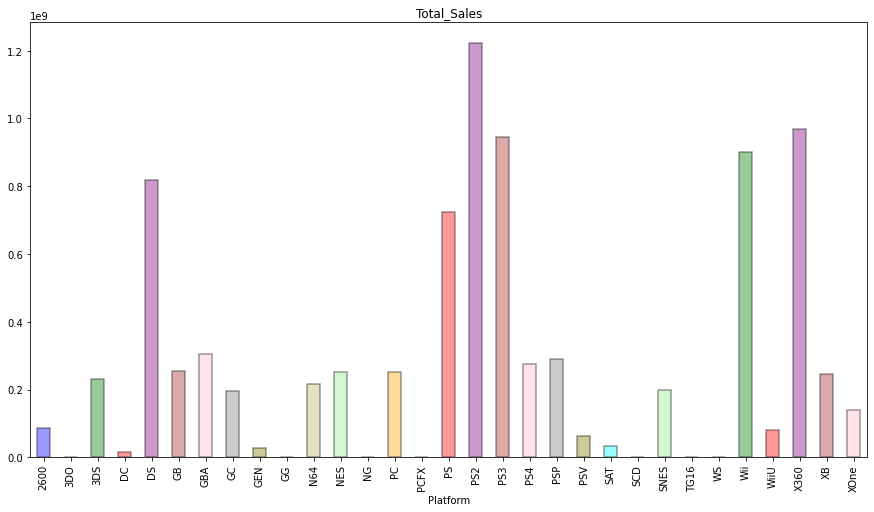

In [19]:
fig = plt.figure(figsize=(15,8))

df.groupby('Platform')['Total_Sales'].sum().plot(kind = 'bar',title = 'Total_Sales', color = ['blue','orange','green','red','purple','brown','pink','grey','olive','cyan','darkkhaki','lightgreen'],
                                           alpha = 0.4, edgecolor = 'black', linewidth = 1.5);

**플랫폼 선호 순위**

* 북미 지역에서는 X360, PS2, Will 플랫폼 순으로 선호하고 있다.
* 유럽 지역에서는 PS3, PS2, X360 플랫폼 순으로 선호하고 있다.
* 일본 지역에서는 DS, PS,PS2 플랫폼 순으로 선호하고 있다.
* 그외 지역에서는 PS2, PS3, X360 플랫폼 순으로 선호하고 있다.

전체적으로 PS2, X360, PS3, Will, DS 플랫폼 순으로 선호하고 있다.

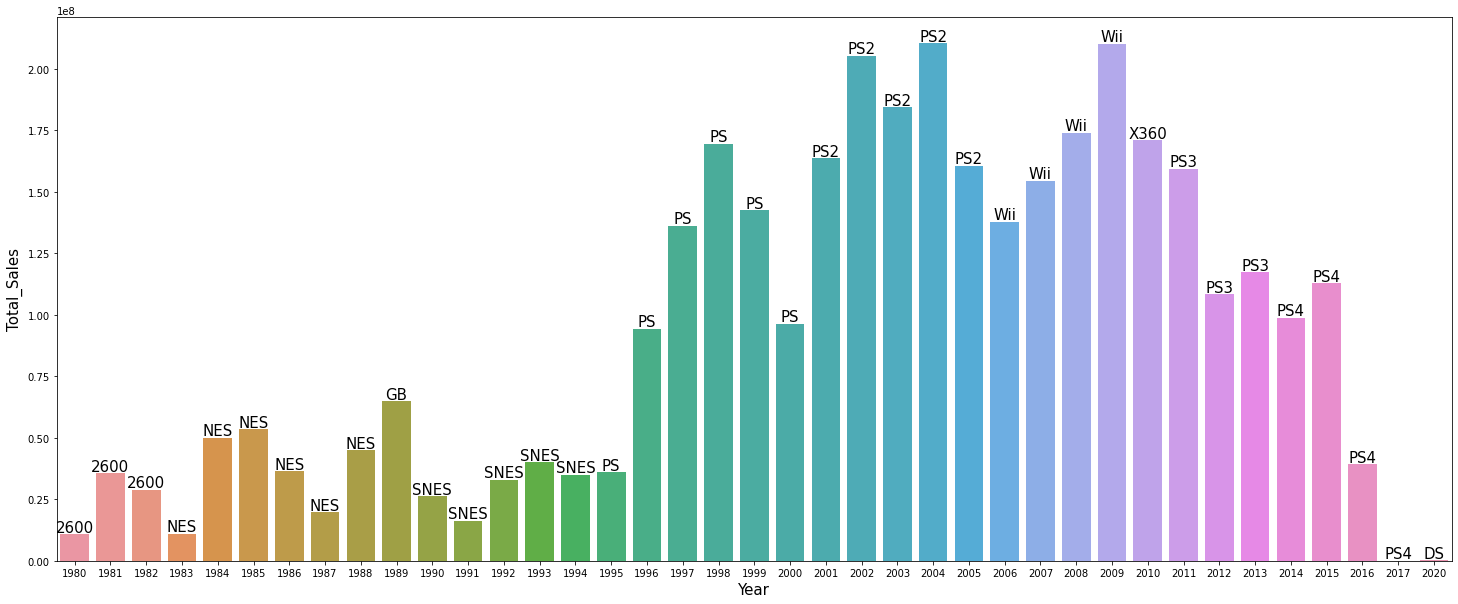

In [20]:
# 연도별 선호하는 플랫폼 시각화
plat_df = df.groupby(['Year','Platform'])['Total_Sales'].sum().reset_index()
plat_df1 = plat_df.groupby('Year')['Total_Sales'].transform(max) == plat_df['Total_Sales']
plat_df_max = plat_df[plat_df1].reset_index(drop = True)


plt.figure(figsize=(25, 10))
ax = sns.barplot(x = 'Year', y= 'Total_Sales', data = plat_df_max);

platform = plat_df_max['Platform']

index = 0
for value in plat_df_max['Total_Sales']:
    ax.text(x = index, y = value+1e6, s = platform[index], size=15, rotation= 0, ha="center")
    index += 1

plt.xlabel('Year', fontsize=15)
plt.ylabel('Total_Sales', fontsize=15)

plt.show();

# 연도별에 따라 선호하는 플랫폼

1990년 초반까지는 닌텐도의 플랫폼을 선호했지만 1990년 중후반부터 현재까지 플레이스테이션과 닌텐도의 플랫폼을 많이 선호하고 있으며 계속해서 업그레이드 버전을 출시하고 있을 만큼 트렌드를 이끌어 가고 있습니다.

In [21]:
rank_df = df.sort_values(['Total_Sales'],ascending=False).reset_index(drop = True)
rank_df = rank_df.head(10)
rank_df = rank_df[['Name','Platform','Year','Genre','Publisher','Total_Sales']]

rank_df

Name Platform  ...  Publisher Total_Sales
0                 Wii Sports      Wii  ...   Nintendo    82740000
1          Super Mario Bros.      NES  ...   Nintendo    40240000
2             Mario Kart Wii      Wii  ...   Nintendo    35830000
3          Wii Sports Resort      Wii  ...   Nintendo    33000000
4   Pokemon Red/Pokemon Blue       GB  ...   Nintendo    31380000
5                     Tetris       GB  ...   Nintendo    30260000
6      New Super Mario Bros.       DS  ...   Nintendo    30010000
7                   Wii Play      Wii  ...   Nintendo    29010000
8  New Super Mario Bros. Wii      Wii  ...   Nintendo    28610000
9                  Duck Hunt      NES  ...   Nintendo    28310000

[10 rows x 6 columns]

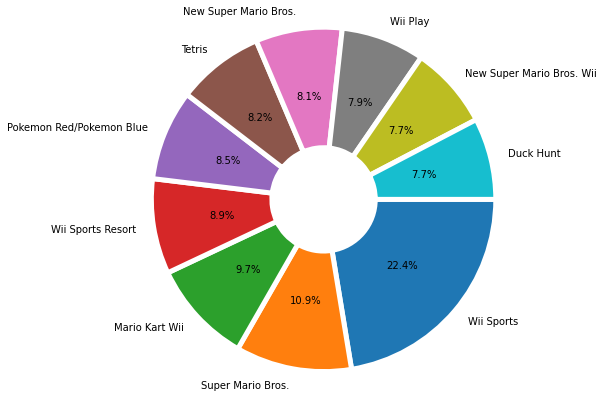

In [22]:
plt.figure(figsize=(9, 7))
data1 = rank_df['Total_Sales']
game1 = rank_df['Name']
plt.pie(data1, labels = game1, autopct = '%0.1f%%', counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 5})
plt.axis('equal')

plt.show();

판매량이 제일 높은 게임은  Will Sports 이며, 
판매량에서 액션 장르가 1위 였지만, 1위에서 10위까지 액션 장르는 단 한개도 없었다. 또한 게임회사는 닌텐도사가 독보적으로 잘나가고 있음을 보여주고 있다.  

In [23]:
top_df = df[df.Year >= 2011].sort_values(['Total_Sales'], ascending=False).reset_index(drop=True)
top_df = top_df.head(10)
top_df = top_df[['Name','Platform','Year','Genre','Publisher','Total_Sales']]

top_df

Name  ... Total_Sales
0                         Grand Theft Auto V  ...    21389999
1                         Grand Theft Auto V  ...    16380000
2             Call of Duty: Modern Warfare 3  ...    14760000
3                  Call of Duty: Black Ops 3  ...    14240000
4                 Call of Duty: Black Ops II  ...    14040000
5                 Call of Duty: Black Ops II  ...    13740000
6             Call of Duty: Modern Warfare 3  ...    13470000
7                               Mario Kart 7  ...    12210000
8                         Grand Theft Auto V  ...    11990000
9  Pokemon Omega Ruby/Pokemon Alpha Sapphire  ...    11330000

[10 rows x 6 columns]

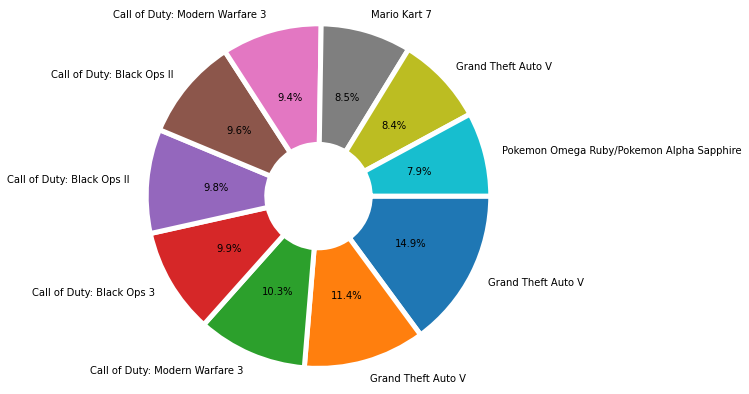

In [24]:
plt.figure(figsize=(9, 7))
data2 = top_df['Total_Sales']
game2 = top_df['Name']
plt.pie(data2, labels = game2, autopct = '%0.1f%%', counterclock=False, wedgeprops={'width': 0.7, 'edgecolor': 'white', 'linewidth': 5})
plt.axis('equal')

plt.show();

최근 10년간 판매량이 제일 높은 게임은 Grand Theft Auto V 이고,장르는 Shooter와 Action 플랫폼은 PS3,PS4,X360가 트렌드를 이끌고 있으며, 시리즈 게임이 강세를 보이고 있습니다.

다음 분기에는 닌텐도, 플레이스테이션의 플랫폼에서 슈터와 액션 장르의 시리즈 게임을 출시하는게 좋을 것 같습니다.